# Classification
## EL5206  - Laboratorio de Inteligencia Computacional y Robótica
### Experiencia 4: Credit Risk
En este notebook se exploran algoritmos de ML para realizar una clasificación de credit scoring.


### Paso 1: Importar los datos con Pandas

In [1]:
# Importar librerías
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

sns.set_context('notebook', 2)

In [2]:
data = pd.read_csv('CREDITRISK_TRIMMED.csv')
data_labels = pd.read_csv('CREDITRISK_PREPROCESSED.csv')

features = data.iloc[:, :].values
labels = data_labels['PAGA'].values

print("Features shape: {}".format(features.shape))
print("Labels shape: {}".format(labels.shape))
print("-----------------------")

_, counts = np.unique(labels, return_counts=True)
print("No Paga: {}".format(counts[0]))
print("Paga: {}".format(counts[1]))
data.head()

Features shape: (2264, 15)
Labels shape: (2264,)
-----------------------
No Paga: 1155
Paga: 1109


,RENTA,EDAD,NIV_EDUC,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Número de meses inactivo,GENERO_0.0,GENERO_1.0,E_CIVIL_0.0,E_CIVIL_1.0,E_CIVIL_2.0,E_CIVIL_3.0
0,463000.0,55.0,1,27,0,-4030,0.0,292673,1,1,0,0,1,0,0
1,1200000.0,59.0,1,121,0,0,27797549.0,0,1,1,0,0,1,0,0
2,526000.0,49.0,2,59,0,750000,0.0,0,0,1,0,0,0,1,0
3,1500000.0,47.0,4,138,0,976444,0.0,0,1,0,1,0,0,1,0
4,2600000.0,41.0,4,60,0,115440,0.0,4500000,3,0,1,0,1,0,0


### Paso 2: Estandarización y Separación de conjuntos de entrenamiento y validación

In [3]:
# Estandarización de características
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

features[:, 0] = scale(features[:,0])
features[:, 4:8] = scale(features[:,3:7])

features_train, features_val, labels_train, labels_val = train_test_split(features, labels, test_size=0.3,
                                                                         random_state=23)

### Paso 3: Regresión Logística

/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages

/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sparra/anaconda2/envs/python36/lib/python3.6/site-packages

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
ROC AUC: 0.8725466056852749


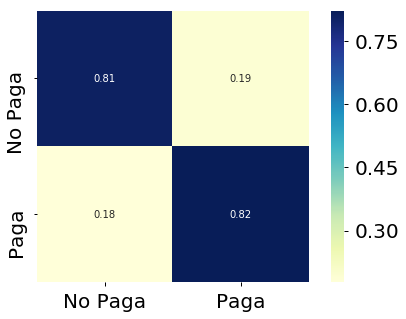

In [4]:
# Hacer fine-tuning con Grid Search Cross-Validation
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parametros a probar
parameters = {'penalty':('l1','l2'), 'C': [0.8, 0.9, 1.0, 1.1, 1.2], 'solver': ('liblinear', 'saga')}
logit = LogisticRegression(random_state=23, n_jobs=1)

clf = GridSearchCV(logit, parameters, 'roc_auc', iid=False, cv=5, n_jobs=-1,
                   return_train_score=True).fit(features_train, labels_train)

print("Best parameters: {}".format(clf.best_params_))
print("ROC AUC: {}".format(clf.best_score_))
logit = clf.best_estimator_

logit_pred = logit.predict(features_val)
conf_matrix = confusion_matrix(labels_val, logit_pred)

cf_normalized = conf_matrix/conf_matrix.sum(axis=1)[:, np.newaxis]

hm = pd.DataFrame(cf_normalized, index=["No Paga", "Paga"], columns=["No Paga", "Paga"])

plt.figure(figsize=(8,5))
sns.heatmap(hm, cmap=cm.YlGnBu, square=True, annot=True)
plt.show()

### Paso 4: Random Forest

Best parameters: {'criterion': 'entropy', 'max_features': 5, 'n_estimators': 1000}
ROC AUC: 0.9776474707884125


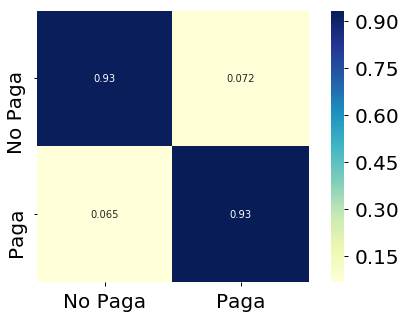

In [5]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[900, 1000, 1100], 'criterion': ('gini','entropy'), 
              'max_features': ('auto', 'log2',4, 5, 6)}
rf = RandomForestClassifier(random_state=23, n_jobs=-1)

clf = GridSearchCV(rf, parameters, 'roc_auc', iid=False, cv=5, n_jobs=-1, 
                   return_train_score=True).fit(features_train, labels_train)

print("Best parameters: {}".format(clf.best_params_))
print("ROC AUC: {}".format(clf.best_score_))
rf = clf.best_estimator_

rf_pred = rf.predict(features_val)
conf_matrix = confusion_matrix(labels_val, rf_pred)

cf_normalized = conf_matrix/conf_matrix.sum(axis=1)[:, np.newaxis]

hm = pd.DataFrame(cf_normalized, index=["No Paga", "Paga"], columns=["No Paga", "Paga"])

plt.figure(figsize=(8,5))
sns.heatmap(hm, cmap=cm.YlGnBu, square=True, annot=True)
plt.show()

### Paso 5: SVM

Best parameters: {'C': 50.0, 'gamma': 0.01, 'kernel': 'rbf'}
ROC AUC: 0.8785118279369881


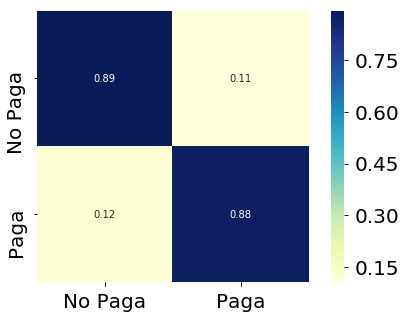

In [6]:
from sklearn.svm import SVC

parameters = {'C':[25.0, 50.0, 75.0], 'kernel': ['rbf'], 'gamma': ["auto", 0.001, 0.01, 0.1]}
svc = SVC(random_state=23) 

clf = GridSearchCV(svc, parameters, 'f1', iid=False, cv=5, n_jobs=-1, verbose=0,
                   return_train_score=True).fit(features_train, labels_train)

print("Best parameters: {}".format(clf.best_params_))
print("ROC AUC: {}".format(clf.best_score_))
svc = clf.best_estimator_

svc_pred = svc.predict(features_val)
conf_matrix = confusion_matrix(labels_val, svc_pred)

cf_normalized = conf_matrix/conf_matrix.sum(axis=1)[:, np.newaxis]

hm = pd.DataFrame(cf_normalized, index=["No Paga", "Paga"], columns=["No Paga", "Paga"])

plt.figure(figsize=(8,5))
sns.heatmap(hm, cmap=cm.YlGnBu, square=True, annot=True)
plt.show()

### Paso 6: Entrenar con CREDITRISK_SCORE

In [7]:
# Leer xlsx
df_score = pd.read_excel('CREDITRISK_SCORE.xlsx', usecols="B:G,J:M,Q")
df_score.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Número de meses inactivo
0,F,500000.0,49.0,MED,CAS,80,0,128846,0.0,188588,1.0
1,M,75000.0,42.0,UNV,CAS,122,0,600000,0.0,0,1.0
2,M,804000.0,29.0,UNV,CAS,101,0,1500000,0.0,43430,1.0
3,M,45500.0,45.0,MED,CAS,55,2223208,1528,0.0,0,1.0
4,M,4820000.0,41.0,UNV,CAS,41,0,434897,0.0,352646,1.0


In [8]:
# Reemplazar datos faltantes
df_score["RENTA"].fillna(-1, inplace=True)
df_score["EDAD"].fillna(-1, inplace=True)
df_score["NIV_EDUC"].fillna(-1, inplace=True)
df_score["Crédito_3"].fillna(-1, inplace=True)
df_score["Número de meses inactivo"].fillna(-1, inplace=True)


# Pasar datos en string a numeros
cat_educ = ['BAS     ', 'MED     ', 'TEC     ', 'EUN     ', 'UNV     ']
df_score["NIV_EDUC"] = pd.Categorical(df_score["NIV_EDUC"], categories=cat_educ).codes

df_score=pd.get_dummies(df_score, columns=['GENERO', 'E_CIVIL'], )
df_score.head()

,RENTA,EDAD,NIV_EDUC,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Número de meses inactivo,GENERO_F,GENERO_M,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
0,500000.0,49.0,1,80,0,128846,0.0,188588,1.0,1,0,1,0,0,0
1,75000.0,42.0,4,122,0,600000,0.0,0,1.0,0,1,1,0,0,0
2,804000.0,29.0,4,101,0,1500000,0.0,43430,1.0,0,1,1,0,0,0
3,45500.0,45.0,1,55,2223208,1528,0.0,0,1.0,0,1,1,0,0,0
4,4820000.0,41.0,4,41,0,434897,0.0,352646,1.0,0,1,1,0,0,0


In [9]:
# Obtener predicciones
features_score = df_score.values

features_score[:, 0] = scale(features_score[:,0])
features_score[:, 4:8] = scale(features_score[:,4:8])
rf_pred_score = rf.predict(features_score)

np.savetxt("score_predictions.csv", rf_pred_score, delimiter=",")